## Project 2 for Supervised Learning

*Please find below the Project 2 for Supervised Learning course.*

### Overview:

1.	Read the column description and ensure you understand each attribute well
2.	Study the data distribution in each attribute, share your findings. (5 points)
3.	Get the target column distribution. Your comments
4.	Split the data into training and test set in the ratio of 70:30 respectively
5.	Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6.	Print the confusion matrix for all the above models (5 points)
7.  Give your reasoning on which is the best model in this case and why it performs better? (5 points)

## Problem Statement 

Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


## Dataset 

Bank_Personal_Loan_Modelling-1.csv

## Import the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read the column description and ensure you understand each attribute well

In [2]:
customers = pd.read_csv('Data/Bank_Personal_Loan_Modelling-1.csv')

In [3]:
customers.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
customers.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
customers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations of the data model:
- ID and ZIP are nominal data and won't have any impact on the target feature
- ZIP may have impact on the Personal Loan if we process that by OneHotEncoding but we will ignore in the given analysis
- Age, Experience, Income, CCAvg and Mortgage are Continuous data
- Family and Education are Categorical and Ordinal data
- Securities Account, CD Account, Online, CreditCard and Personal Loan are Categorical and Binary data
- Personal Loan is a target feature

## Study the data distribution in each attribute, share your findings. (5 points)

### Data Cleanup:

#### 1. Null or NA values

In [6]:
customers.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [7]:
customers.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

There are 5000 entries in the dataset without NA or Null or missing values

#### 2. Negative values:

Above describe() shows that Experience has Negative value. Finding out how many of them are Negative.

In [8]:
(customers.Experience < 0).value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In the given problem, it is safe to set Negative Experience values to 0

In [9]:
# Setting Negative columns to zero
customers.loc[customers.Experience < 0, 'Experience'] = 0

In [10]:
(customers.Experience < 0).value_counts()

False    5000
Name: Experience, dtype: int64

### Ditributions: 

#### Continuous Variables: Age and Experience

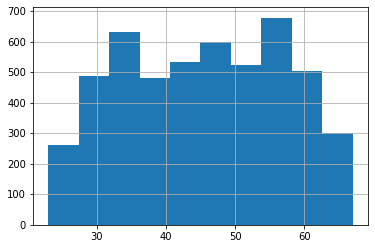

In [11]:
customers.Age.hist()

$Observations$:
    - Age seem to be normally distributed
    - The variance of Age seemed to be high from the mean value
    - Most of the customers seemed to be aged between 30 and 60

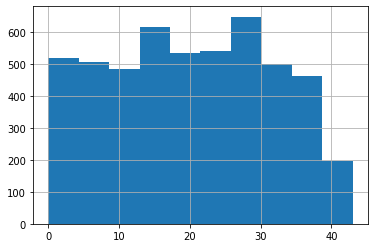

In [12]:
customers.Experience.hist()

$Observations$:
- Experience doesn't seem to have normal distribution
- The variance seemed to be high from the mean value

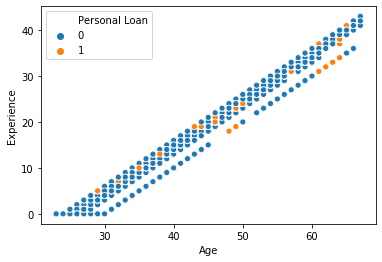

In [13]:
sns.scatterplot(data=customers, x='Age', y='Experience', hue='Personal Loan')

$Observations$:
- Age and Experience are strongly correlated. It can be safer to consider to only one of them. The other won't have additional impact on the target variable.
- Both of them don't seem to have much impact on whether the customer applied for the Personal Loan or not
- Both of them can be excluded in the modeling

#### Education and Income:

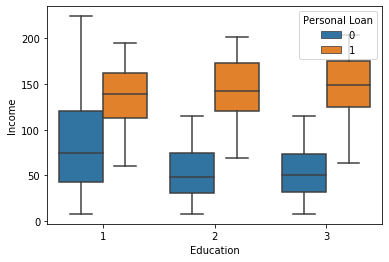

In [14]:
sns.boxplot(data=customers, x='Education', y='Income', hue='Personal Loan')

$Observation:$
- Proportion of customers who applied for Persoanl Loan are almost same with all education level.
- So, Education may not have much impact on the target variable

#### Family and Income:

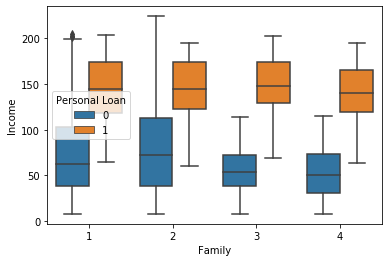

In [15]:
sns.boxplot(data=customers, x='Family', y='Income', hue='Personal Loan')

$Observation:$
- Proportion of customers who applied for Persoanl Loan are almost same with number of Family members
- So, Family members may not have much impact on the target variable
- Customers who applied for Personal Loan seemed to have higher Income than who didn't apply
- So, Income seemed to be impacting the target variable and so should be included in the modeling

#### Mortgage:

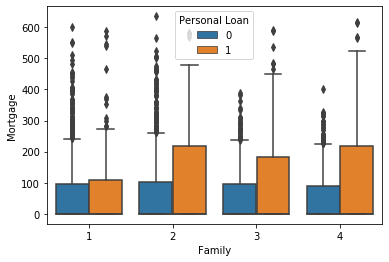

In [16]:
sns.boxplot(data=customers, x='Family', y='Mortgage', hue='Personal Loan')

$Observations:$
    - Customers who applied for Personal Loan have high Mortgage than who didn't apply for Persoanl Loan
    - Mortgage amount seemed to high impact on the target variable and so should be included in the modeling

#### CCAvg and CreditCard:

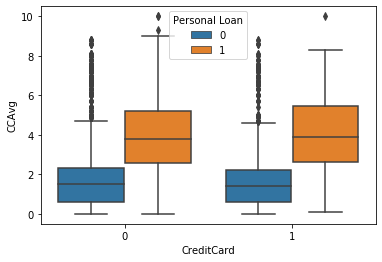

In [17]:
sns.boxplot(data=customers, x='CreditCard', y='CCAvg', hue='Personal Loan')

$Observations:$
- Customers who applied for Personal Loan seemed to have high Credit Card spending than who didn't apply
- Credit Card spending has higher impact on target variable and so must be included in the modeling
- Number of customers who applied for Personal Loan are almost same whether the customers use the CreditCard issued by the bank or not
- CreditCard doesn't seem to have much impact on the target variable

#### Securities Account:

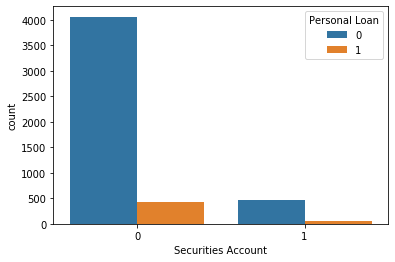

In [18]:
sns.countplot(data=customers, x='Securities Account', hue='Personal Loan')

$Observations:$
- More number of customer who have Securities Account applied for Personal Loan

#### Online:

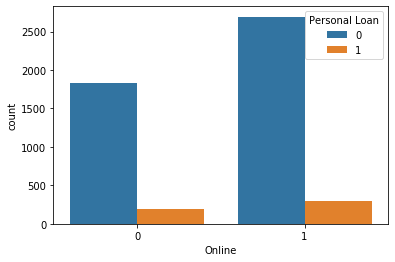

In [19]:
sns.countplot(data=customers, x='Online', hue='Personal Loan')

$Observations:$
- The number of customers who use internet banking and applied for Personal Loan are slighly higher than the customers who don't user internet banking

#### CD Account:

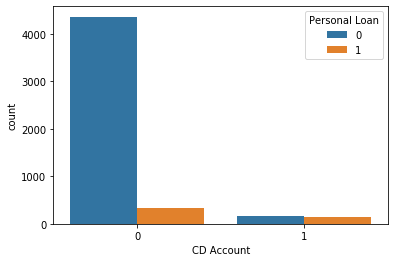

In [20]:
sns.countplot(data=customers, x='CD Account', hue='Personal Loan')

$Observations:$
- The number of customers having CD Account is significantly less than those who don't have CD Account
- The number of customers who have CD Account and applied for Personal Loan are less than the customers who don't have CD Account

### Get the target column distribution. Your comments

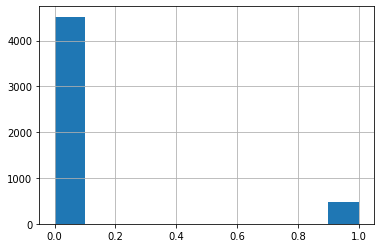

In [21]:
customers['Personal Loan'].hist()

In [22]:
customers['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

$Observations:$
- Personal Loan is Categorical and Binary variable
- Personal Loan is highly right-skewed distribution. Only 480 out of 4520 applied for the Personal Loan

## Data Processing

#### 1. Delete Unwanted attribute:
- ID is nominal variable and it won't have impact on the target variable of Personal Loan.
- ZIP is a nominal variable. Ideally, it could have been processed if we know the geographical location of ZIP area OR it could have been processed with OneHotEncoding. Deleting ZIP in the current modeling.

In [23]:
customers.drop(labels=['ID', 'ZIP Code'], inplace=True, axis=1)

#### 2. Delete Attribute with low correlation (< 0.01)

In [24]:
customers.corr()['Personal Loan']

Age                  -0.007726
Experience           -0.007858
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

Deleting these features having less than 0.01 Correlation:
- Age
- Experience
- Online
- CreditCard

This is also evident from the Exploratory Data Analysis conducted above on which variables are impacting and which are not impacting the target variable of Personal Loan

In [25]:
customers.drop(labels=['Age', 'Experience', 'Online', 'CreditCard'], inplace=True, axis=1)

In [26]:
customers.corr()['Personal Loan']

Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Name: Personal Loan, dtype: float64

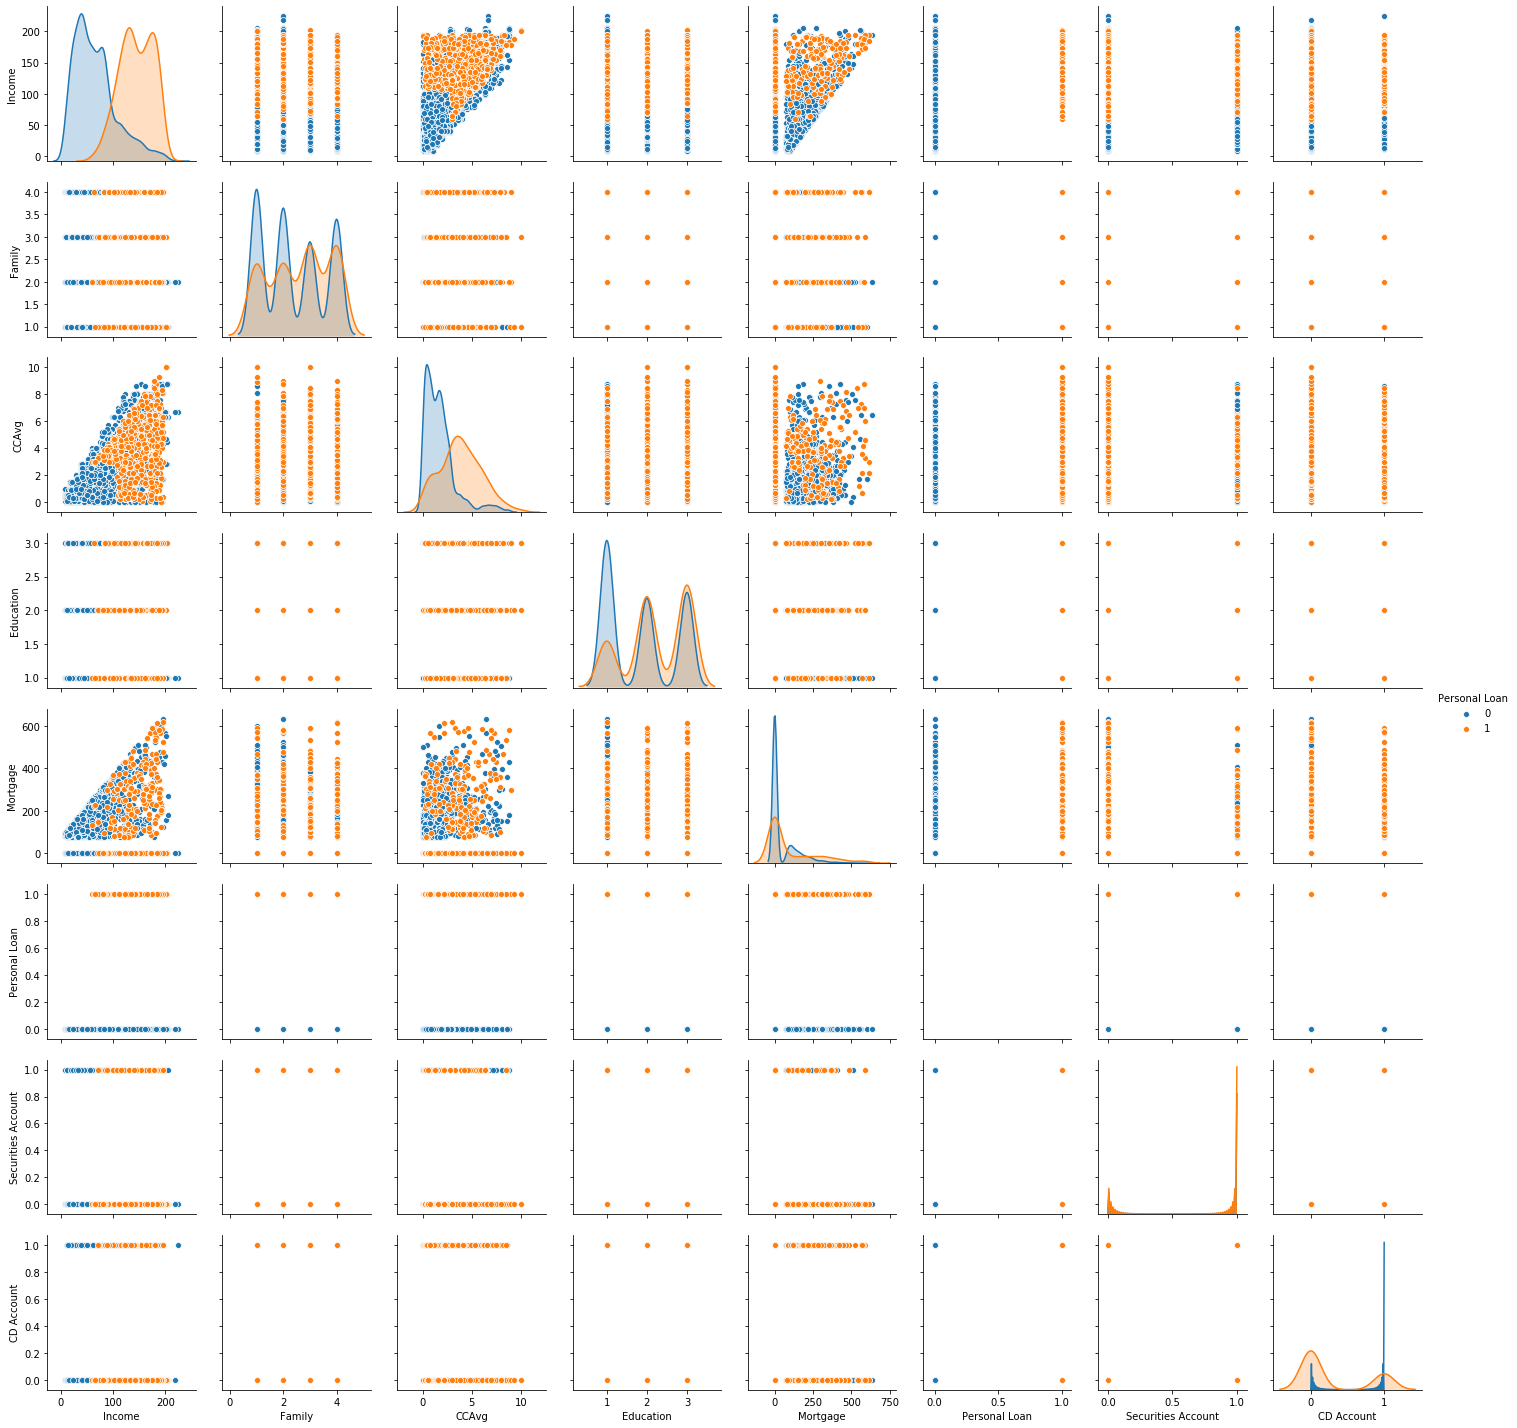

In [27]:
sns.pairplot(customers, hue='Personal Loan')

## Split the data into training and test set in the ratio of 70:30 respectively

In [28]:
y = customers['Personal Loan']
X = customers.drop('Personal Loan', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Number of train records', len(X_train))
print('Number of test records', len(X_test))

Number of train records 3500
Number of test records 1500


## Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

Scale the features before creating models:

In [30]:
sc = StandardScaler()

sc.fit(X_train)

scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

### Logistic Regression:

In [31]:
lr_model = LogisticRegression()
lr_model.fit(scaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
print('Training Accuracy: ', lr_model.score(scaledX_train, y_train))
print('Testing Accuracy: ', lr_model.score(scaledX_test, y_test))

Training Accuracy:  0.9482857142857143
Testing Accuracy:  0.944


In [33]:
lr_predict = lr_model.predict(scaledX_test)

### K-NN Model:

In [34]:
neighbours = list(range(1,31))
knn_scores = list()
for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='accuracy')
    knn_score = []
    knn_score.append(k)
    knn_score.append(scores.mean())
    knn_scores.append(knn_score)

In [35]:
knn_scores = pd.DataFrame(knn_scores, columns=['k', 'score'])

Getting k value with maximum accuracy

In [36]:
knn_scores.sort_values(by=['score'], ascending=False, inplace=True)

In [37]:
knn_scores.reset_index(drop=True, inplace=True)
knn_scores.head(3)

,k,score
0,1,0.978289
1,3,0.974005
2,5,0.970005


In [63]:
opt = knn_scores.loc[0, 'k']
if opt == 1:
    print('Skipping the default value of 1 neighbour and getting next value\n')
    opt = knn_scores.loc[1, 'k']
print('Optimal neightbour value with maximum Accuracy: ', opt, '\nBuilding the model again to get the prediction.')

Skipping the default value of 1 neighbour and getting next value

Optimal neightbour value with maximum Accuracy:  3 
Building the model again to get the prediction.


In [39]:
knn = KNeighborsClassifier(n_neighbors=opt)

knn.fit(scaledX_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
print('Training Accuracy : ', knn.score(scaledX_train, y_train))
print('Testing Accuracy: ', knn.score(scaledX_test, y_test))

Training Accuracy :  0.9865714285714285
Testing Accuracy:  0.9626666666666667


In [41]:
knn_predict = knn.predict(scaledX_test)

### Naive Bayes

There are three popular types of NaiveBayes model: Gaussian, MultiVariate and MultiBinomial.
- Gaussian is used for Continuous data
- MultiVariate is used for Descrete data
- MultiBinomial is used for Binary data i.e. Text classification where many 0 and 1 present.

In this problem, since most of the selected features are of Continuous type, we will use Gaussian model.

In [42]:
gaussian = GaussianNB()
gaussian.fit(scaledX_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
print('Training Accuracy: ', gaussian.score(scaledX_train, y_train))
print('Testing Accuracy: ', gaussian.score(scaledX_test, y_test))

Training Accuracy:  0.8897142857142857
Testing Accuracy:  0.8753333333333333


In [44]:
nb_predict = gaussian.predict(scaledX_test)

### DecisionTree:

In [45]:
depths = list(range(1,11))
dt_scores = list()
for depth in depths:
    dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth)
    scores = cross_val_score(dt_model, scaledX_train, y_train, cv=10, scoring='accuracy')
    dt_score = []
    dt_score.append(depth)
    dt_score.append(scores.mean())
    dt_scores.append(dt_score)

In [46]:
dt_scores = pd.DataFrame(dt_scores, columns=['depth', 'score'])

In [60]:
opt = dt_scores.loc[dt_scores['score'].idxmax()]
opt

depth    4.000000
score    0.987431
Name: 3, dtype: float64

In [62]:
print('Optimal depth value with maximum Accuracy: ', opt.depth, '\nBuilding the model again to get the prediction.')

Optimal depth value with maximum Accuracy:  4.0 
Building the model again to get the prediction.


In [48]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=opt.depth.astype(int))
dt_model.fit(scaledX_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
print('Training Accuracy: ', dt_model.score(scaledX_train, y_train))
print('Testing Accuracy: ', dt_model.score(scaledX_test, y_test))

Training Accuracy:  0.9888571428571429
Testing Accuracy:  0.9806666666666667


In [50]:
dt_predict = dt_model.predict(scaledX_test)

## Print the confusion matrix for all the above models (5 points)

In [51]:
confusion_matrix(y_test, lr_predict)

array([[1335,   16],
       [  68,   81]], dtype=int64)

In [52]:
print('Linear Regression Classification Report')
print(classification_report(y_test, lr_predict))

Linear Regression Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.54      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [53]:
confusion_matrix(y_test, knn_predict)

array([[1345,    6],
       [  50,   99]], dtype=int64)

In [54]:
print('KNN Model Classification Report')
print(classification_report(y_test, knn_predict))

KNN Model Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.94      0.66      0.78       149

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [55]:
confusion_matrix(y_test, nb_predict)

array([[1228,  123],
       [  64,   85]], dtype=int64)

In [56]:
print('Naive Bayes Classification Report')
print(classification_report(y_test, nb_predict))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



In [57]:
confusion_matrix(y_test, dt_predict)

array([[1344,    7],
       [  22,  127]], dtype=int64)

In [58]:
print('Decision Tree Classification Report')
print(classification_report(y_test, dt_predict))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.95      0.85      0.90       149

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Summary of all of the models:
- Decision Tree:
    - Accuracy: 0.98
    - f1-score: 0.90
- KNN Model:
    - Accuracy: 0.96
    - f1-score: 0.78
- Linear Regression:
    - Accuracy: 0.94
    - f1-score: 0.66
- Naive Bayes:
    - Accuracy: 0.88
    - f1-score: 0.48
 
### The accuracy and f1-score of all models are in decreasing order: DecisionTree, KNN, Logistic Regression and then Naive Bayes
### Based on the accuracy and f1-score of all the models, DecisionTree model will work best.